<a href="https://colab.research.google.com/github/Hidayathamir/Data-Science-in-Telco-Data-Cleansing/blob/main/Data_Science_in_Telco_Data_Cleansing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Latar Belakang
DQLab Telco merupakan perusahaan Telco yang sudah mempunyai banyak cabang tersebar dimana-mana. Sejak berdiri pada tahun 2019, DQLab Telco konsisten untuk memperhatikan customer experience nya sehingga tidak akan di tinggalkan pelanggan.

Walaupun baru berumur 1 tahun lebih sedikit, DQLab Telco sudah mempunyai banyak pelanggan yang beralih langganan ke kompetitior. Pihak management ingin mengurangi jumlah pelanggan yang beralih (churn) dengan menggunakan machine learning.

Oleh karena itu, tim Data Scientist dimimta untuk mempersiapkan data sekaligus membuat model prediksi yang tepat untuk menentukan pelanggan akan berhenti berlangganan (churn) atau tidak.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/dqlab_telco.csv')
df

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,202006,45759018157,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,202006,45557574145,Male,0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,202006,45366876421,Male,0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,202006,45779536532,Male,0,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,202006,45923787906,Female,0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7108,202006,45117219093,Male,0,Yes,Yes,53.0,Yes,Yes,DSL,Yes,Yes,No,No,No,Yes,Two year,No,Bank transfer (automatic),69.70,3686.05,NaN
7109,202006,45564915800,Female,0,No,No,12.0,Yes,No,Fiber optic,No,No,Yes,No,Yes,Yes,One year,No,Mailed check,95.50,1115.15,NaN
7110,202006,45655964195,Male,0,No,No,26.0,Yes,No,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,98.65,2537.00,NaN
7111,202006,45899251814,Male,0,No,No,21.0,Yes,No,DSL,No,No,Yes,No,No,Yes,Month-to-month,No,Mailed check,61.65,1393.60,NaN


In [3]:
df.columns

Index(['UpdatedAt', 'customerID', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn'],
      dtype='object')

* UpdatedAt : Periode of Data taken
* customerID : Customer ID
* gender : Whether the customer is a male or a female (Male, Female)
* SeniorCitizen : Whether the customer is a senior citizen or not (1, 0)
* Partner : Whether the customer has a partner or not (Yes, No)
* Dependents : Whether the customer has dependents or not (Yes, No)
* tenure : Number of months the customer has stayed with the company
* PhoneService : Whether the customer has a phone service or not (Yes, No)
* MultipleLines : Whether the customer has multiple lines or not (Yes, No, No phone service)
* InternetService : Customer’s internet service provider (DSL, Fiber optic, No)
* OnlineSecurity : Whether the customer has online security or not (Yes, No, No internet service)
* OnlineBackup : Whether the customer has online backup or not (Yes, No, No internet service)
* DeviceProtection : Whether the customer has device protection or not (Yes, No, No internet service)
* TechSupport : Whether the customer has tech support or not (Yes, No, No internet service)
* StreamingTV : Whether the customer has streaming TV or not (Yes, No, No internet service)
* StreamingMovies : Whether the customer has streaming movies or not (Yes, No, No internet service)
* Contract : The contract term of the customer (Month-to-month, One year, Two year)
* PaperlessBilling : Whether the customer has paperless billing or not (Yes, No)
* PaymentMethod : The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
* MonthlyCharges : The amount charged to the customer monthly
* TotalCharges : The total amount charged to the customer
Churn Whether the customer churned or not (Yes or No)

# 1. Validitas customerID

In [4]:
# valid number 45dddddddddd
df['valid_id'] = df['customerID'].astype(str).str.match(r'(45\d{9,10})')
# only takes valid number then drop valid_id column
df = (df[df['valid_id'] == True]).drop('valid_id', axis = 1)
# drop duplicates row
df = df.drop_duplicates()
# sort value regarding UpdatedAt column then drop duplicates customerID
df = df.sort_values(['UpdatedAt']).drop_duplicates(['customerID'])

# 2. Missing value

In [5]:
df.isna().sum()

UpdatedAt            0
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure              99
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges      26
TotalCharges        15
Churn               43
dtype: int64

In [6]:
# only accept non na in Churn column
df = df.dropna(subset=['Churn'])
df.isna().sum()

UpdatedAt            0
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure              99
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges      26
TotalCharges        15
Churn                0
dtype: int64

In [7]:
# default value for na in tenure columns = 11
df.tenure = df.tenure.fillna(11)
df.isna().sum()

UpdatedAt            0
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges      26
TotalCharges        15
Churn                0
dtype: int64

In [8]:
# other na will be median
for i in ['MonthlyCharges', 'TotalCharges']:
  if df[i].isna().sum()>0:
    df[i].fillna(df[i].median(), inplace=True)
df.isna().sum()

UpdatedAt           0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# 3. Outliner

Before

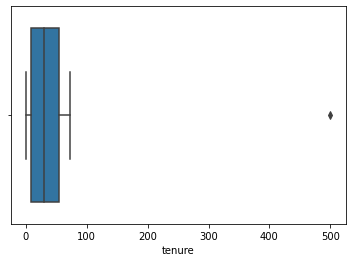

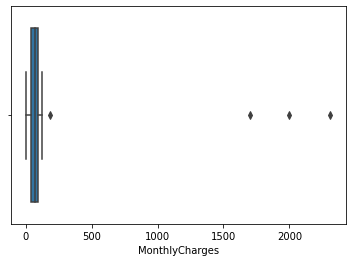

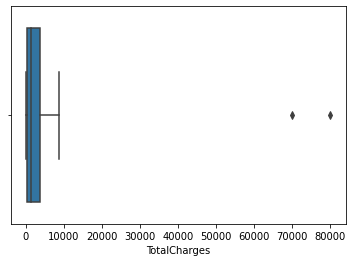

,tenure,MonthlyCharges,TotalCharges
count,6950.000000,6950.00000,6950.000000
mean,32.477266,65.79741,2305.135403
std,25.188910,50.47553,2578.739530
min,0.000000,0.00000,19.000000
25%,9.000000,36.46250,406.975000
50%,29.000000,70.45000,1400.850000
75%,55.000000,89.85000,3799.837500
max,500.000000,2311.00000,80000.000000


In [9]:
plt.figure()
sns.boxplot(x=df['tenure'])
plt.show()

plt.figure()
sns.boxplot(x=df['MonthlyCharges'])
plt.show()

plt.figure()
sns.boxplot(x=df['TotalCharges'])
plt.show()

df[['tenure','MonthlyCharges','TotalCharges']].describe()

Process

In [10]:
Q1 = df[['tenure', 'MonthlyCharges', 'TotalCharges']].quantile(0.25)
Q3 = df[['tenure', 'MonthlyCharges', 'TotalCharges']].quantile(0.75)
IQR = Q3 - Q1
maximum = Q3 + 1.5*IQR
minimum = Q1 - 1.5*IQR

higher = df > maximum
lower = df < minimum


df = df.mask(higher, maximum, axis=1) # df.mask = nilai yang true diganti dengan maximum
df = df.mask(lower, minimum, axis=1)

After

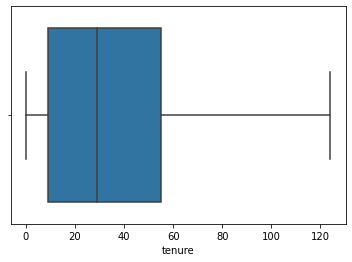

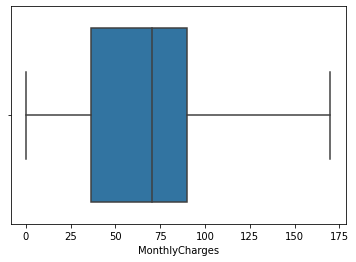

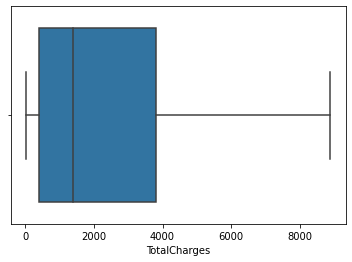

,tenure,MonthlyCharges,TotalCharges
count,6950.000000,6950.000000,6950.000000
mean,32.423165,65.004414,2286.110692
std,24.581073,30.056732,2265.803585
min,0.000000,0.000000,19.000000
25%,9.000000,36.462500,406.975000
50%,29.000000,70.450000,1400.850000
75%,55.000000,89.850000,3799.837500
max,124.000000,169.931250,8889.131250


In [11]:
plt.figure()
sns.boxplot(x=df['tenure'])
plt.show()

plt.figure()
sns.boxplot(x=df['MonthlyCharges'])
plt.show()

plt.figure()
sns.boxplot(x=df['TotalCharges'])
plt.show()

df[['tenure','MonthlyCharges','TotalCharges']].describe()

# 4. Standarisasi input

In [12]:
for i in ['gender','Dependents','Churn']:
  print(df[i].value_counts(), '\n\n')

Male         3499
Female       3431
Wanita         14
Laki-Laki       6
Name: gender, dtype: int64 


No     4870
Yes    2060
Iya      20
Name: Dependents, dtype: int64 


No       5114
Yes      1827
Churn       9
Name: Churn, dtype: int64 




In [13]:
d = {
     'Wanita' : 'Female',
     'Laki-Laki' : 'Male',
     'Iya' : 'Yes',
     'Churn' : 'Yes'
}
df = df.replace(d)

In [14]:
for i in ['gender','Dependents','Churn']:
  print(df[i].value_counts(), '\n\n')

Male      3505
Female    3445
Name: gender, dtype: int64 


No     4870
Yes    2080
Name: Dependents, dtype: int64 


No     5114
Yes    1836
Name: Churn, dtype: int64 


